## Notebook presents the collected data from different perspectives:
- PART 1: Plots showing the dependency of infections/deaths caused by COVID19 and vaccination percentage in counties.
- PART 2: Plots showing the dependency of infections/deaths caused by COVID19 and vaccination percentage in counties and visualizing the population size or population density by the size of the points.
- PART 3: Three plots which represent the whole data cut into 3 parts, dependent on either 'Population' or 'Population Density' properties. The two cutoff points can be define below.
- PART 4: Data is also cut off like PART 3, but it is in one plot and instead colors are used

In [365]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
# Data file [from here data is read from]
filename = 'data/vax_cases_deaths.csv'

In [367]:
#Path to save figures
path = "figures/"

In [368]:
# This iformation is needed for the title of the figures. THE PERIOD MUST BE SAME AS IN FILE 'Vax_cases_deaths.ipynb' or you can only fill period_start with a custom name and leave period_end blank
period_start = '12/15/2021'
period_end = '01/31/2022'

### Choose the maximum and minimum population size of counties taken into consideration
The cases and deaths will be shown per 10000 inhabitants

In [377]:
pop_min = 1000
pop_max = 100000000000000

### Choose cutoff points for part 3 and the property on which the plots will be dependent, either 'Population' or 'Population Density'

In [378]:
plot_dep = 'Population Density' #'Population'

cut_point1 = 100
cut_point2 = 12000

### Choose what you want to see on x and y axis
- X axis: 'Percentage of fully vaccinated' or 'Percentage of vaccinated with booster'
- Y axis: 'Infections per 10k inhabitants' or 'Deaths per 10k inhabitants'

In [389]:
x_name = 'Percentage of fully vaccinated'
y_name = 'Infections per 10k inhabitants'

### Reading the file and processing/ cleaning the data

In [380]:
df_all = pd.read_csv(filename)

In [381]:
#Clean and filter the data
filter_pop = df_all[ (df_all['Population'] > pop_min) & (df_all['Population'] < pop_max) ]
filter_pop = filter_pop[ filter_pop['Complete_pct_end'] != 0 ]
filter_pop = filter_pop[ filter_pop['Deaths_begin'] < filter_pop['Deaths_end'] ]
filter_pop = filter_pop[ filter_pop['Cases_begin'] < filter_pop['Cases_end'] ]
#filter_cases = filter_cases[ filter_cases['Cases_diff'] > 10 ]
    
filter_pop['Infections per 10k inhabitants'] = (filter_pop['Cases in given period'])*10000/filter_pop['Population']
filter_pop['Deaths per 10k inhabitants'] = (filter_pop['Deaths in given period'])*10000/filter_pop['Population']

### Part 1

Text(0, 0.5, 'Deaths per 10k inhabitants')

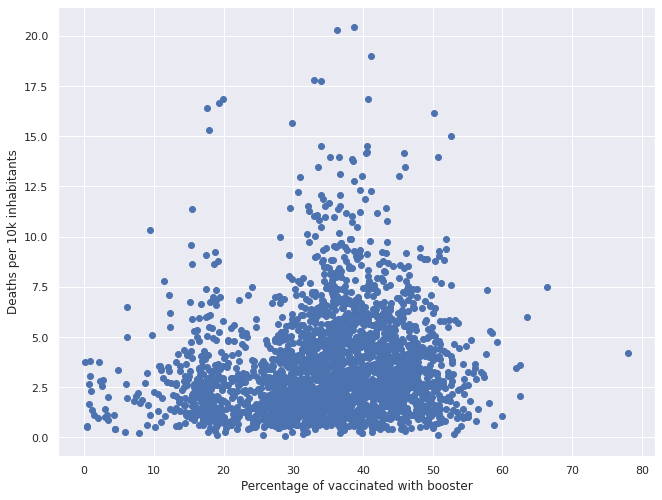

In [382]:
#Present the data of number of deaths caused by COVID19 against percentage of fully vaccinated
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop[x_name], filter_pop[y_name], alpha = 1)
plt.xlabel(x_name)
plt.ylabel(y_name)
#plt.savefig(path + x_name.replace(" ","") + '_' + y_name.replace(" ","") + "_" + period_start.replace("/","") + '_' + period_end.replace("/","") + '.png')

### Part 2

<AxesSubplot:xlabel='Percentage of vaccinated with booster', ylabel='Deaths per 10k inhabitants'>

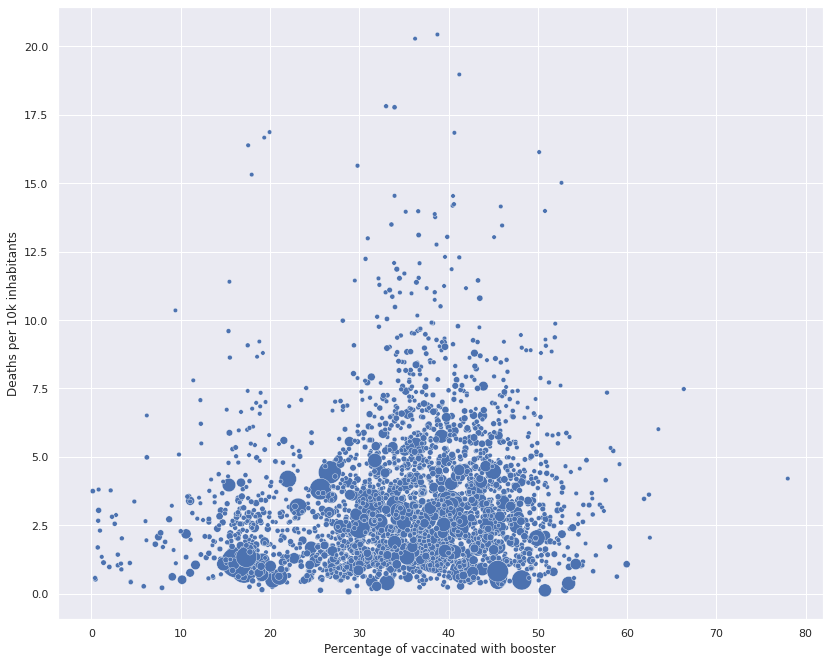

In [383]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x=x_name, y=y_name, size="Population", legend=False, sizes=(20, 2000))

<AxesSubplot:xlabel='Percentage of vaccinated with booster', ylabel='Deaths per 10k inhabitants'>

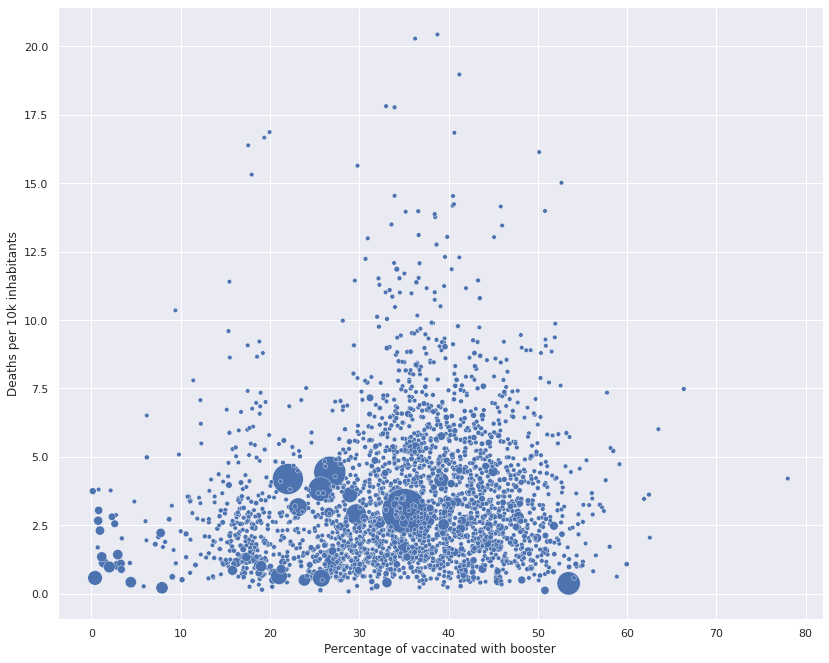

In [384]:
sns.set(rc={'figure.figsize':(13.7,11.27)})
sns.scatterplot(data=filter_pop, x=x_name, y=y_name, size="Population Density", legend=False, sizes=(20, 2000))

### Part 3. Here are shown 3 plots which represent the whole data cut into 3 parts, based on given above propery ('Population' or 'Population Density').

[Text(0.5, 1.0, 'Population Density: above 12000')]

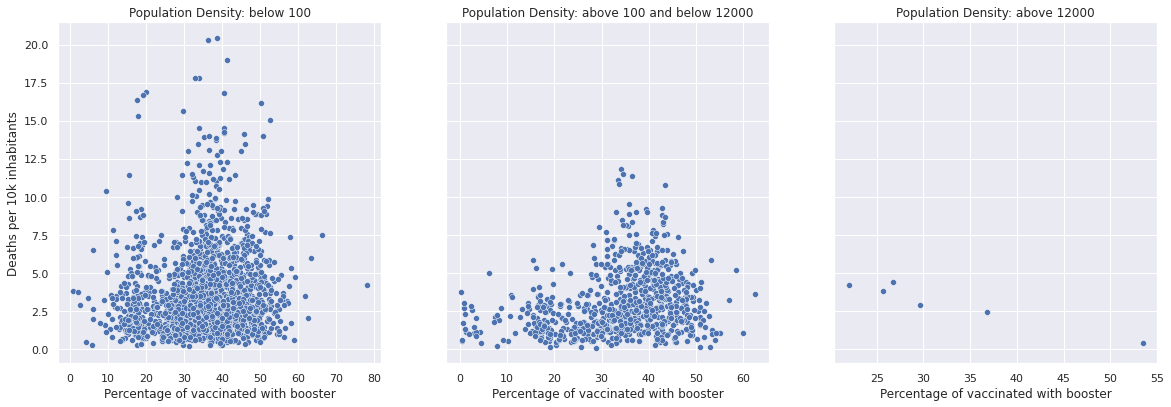

In [385]:
sns.set(rc={'figure.figsize':(19.7,6.27)})
fig, axs = plt.subplots(1,3,  sharey=True)
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= filter_pop[plot_dep].min()) & (filter_pop[plot_dep] < cut_point1) ], x=x_name, y=y_name, legend=False, sizes=(5, 500), alpha=1, ax=axs[0]).set(title = plot_dep + ': below ' + str(cut_point1))
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= cut_point1) & (filter_pop[plot_dep] < cut_point2) ], x=x_name, y=y_name, legend=False, sizes=(5, 500), alpha=1, ax=axs[1]).set(title = plot_dep + ': above ' + str(cut_point1) + ' and below ' + str(cut_point2))
sns.scatterplot(data=filter_pop[ (filter_pop[plot_dep] >= cut_point2) & (filter_pop[plot_dep] < filter_pop[plot_dep].max()) ], x=x_name, y=y_name, legend=False, sizes=(5, 500), alpha=1, ax=axs[2]).set(title = plot_dep + ': above ' + str(cut_point2))

### Part 4. Here data is coloured based cutoff points of a given property 

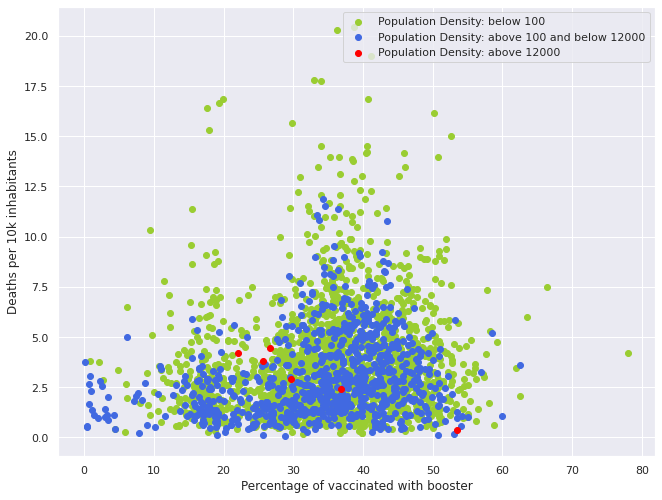

In [386]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
data1 = filter_pop[ (filter_pop[plot_dep] >= filter_pop[plot_dep].min()) & (filter_pop[plot_dep] < cut_point1) ]
plt.scatter(data1[x_name], data1[y_name], color='yellowgreen', label=plot_dep + ': below ' + str(cut_point1))
data2 = filter_pop[ (filter_pop[plot_dep] >= cut_point1) & (filter_pop[plot_dep] < cut_point2) ]
plt.scatter(data2[x_name], data2[y_name], color='royalblue', label=plot_dep + ': above ' + str(cut_point1) + ' and below ' + str(cut_point2))
data3 = filter_pop[ (filter_pop[plot_dep] >= cut_point2) & (filter_pop[plot_dep] < filter_pop[plot_dep].max()) ]
plt.scatter(data3[x_name], data3[y_name], color='red', label=plot_dep + ': above ' + str(cut_point2))
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.legend()

### Part 5. Analysis of specific cases

In [387]:
# Blaine county (Idaho)
filter_pop[filter_pop["countyFIPS"] == 16013]

,countyFIPS,County Name,State,Population,Land Area in square miles,Population Density,Cases_begin,Cases_end,Deaths_begin,Deaths_end,...,Complete65_begin,Complete65_end,Complete65_pct_begin,Complete65_pct_end,Cases in given period,Deaths in given period,Percentage of fully vaccinated,Percentage of vaccinated with booster,Infections per 10k inhabitants,Deaths per 10k inhabitants
557,16013,Blaine County,ID,23021,2643.59,8.708234,3249,4826,27,28,...,4818,4846,95.0,95.0,1577,1,75.25,44.15,685.026715,0.434386


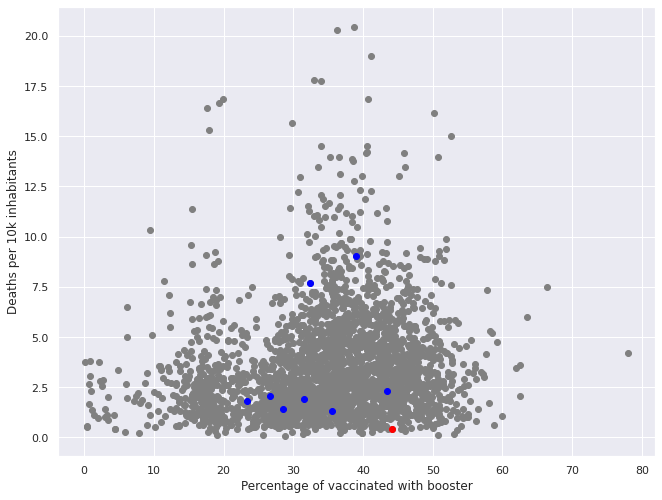

In [388]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.scatter(filter_pop[x_name], filter_pop[y_name], color="gray")
blaine = filter_pop[filter_pop["countyFIPS"] == 16013]
blaine_neighbours = filter_pop[filter_pop["countyFIPS"].isin([16039, 16025, 16067, 16037, 16077, 16031, 16023, 16011, 16063])] #Neighbor counties with no data: Butte, Bingham, Lincoln
plt.scatter(blaine[x_name], blaine[y_name], color="red")
plt.scatter(blaine_neighbours[x_name], blaine_neighbours[y_name], color="blue")
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.savefig(path + 'fig8.png')

In [395]:
# Three outliers

filter_pop[(filter_pop['Infections per 10k inhabitants'] > 1500) & (filter_pop['Percentage of fully vaccinated'] > 60)]

,countyFIPS,County Name,State,Population,Land Area in square miles,Population Density,Cases_begin,Cases_end,Deaths_begin,Deaths_end,...,Complete65_begin,Complete65_end,Complete65_pct_begin,Complete65_pct_end,Cases in given period,Deaths in given period,Percentage of fully vaccinated,Percentage of vaccinated with booster,Infections per 10k inhabitants,Deaths per 10k inhabitants
3086,55078,Menominee County,WI,4556,357.61,12.740136,1019,1795,11,12,...,636,637,95.0,95.0,776,1,76.85,36.15,1703.248464,2.194908
3138,56039,Teton County,WY,23464,3995.38,5.872783,5460,9323,14,15,...,3549,3579,95.0,95.0,3863,1,88.65,39.50,1646.351858,0.426185


In [396]:
filter_pop[(filter_pop['Infections per 10k inhabitants'] > 1000) & (filter_pop['Percentage of fully vaccinated'] > 90)]

,countyFIPS,County Name,State,Population,Land Area in square miles,Population Density,Cases_begin,Cases_end,Deaths_begin,Deaths_end,...,Complete65_begin,Complete65_end,Complete65_pct_begin,Complete65_pct_end,Cases in given period,Deaths in given period,Percentage of fully vaccinated,Percentage of vaccinated with booster,Infections per 10k inhabitants,Deaths per 10k inhabitants
108,4023,Santa Cruz County,AZ,46498,1236.92,37.59176,10203,15699,202,212,...,9174,9333,95.0,95.0,5496,10,95.0,28.7,1181.986322,2.15063
